In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import math 
import seaborn as sns 
import matplotlib.pyplot as plt


In [18]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print(train_data.head())
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
#test_data.head()
problem_name='kaggle_titanic'

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
train_data.keys() 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:


df=train_data
id_key=0
y_key=1
extra_removes=list([3])
keys_to_remove=list([y_key,id_key])+extra_removes


pairs_to_display=math.ceil((train_data.keys().size-2)/2 )
keys_to_plot=list(range(len(df.keys())))

for element in keys_to_remove:
    keys_to_plot.remove(element)

print(keys_to_plot)

[2, 4, 5, 6, 7, 8, 9, 10, 11]


0 0
1 0
0 1
1 1
0 2
1 2
0 3
1 3
0 4


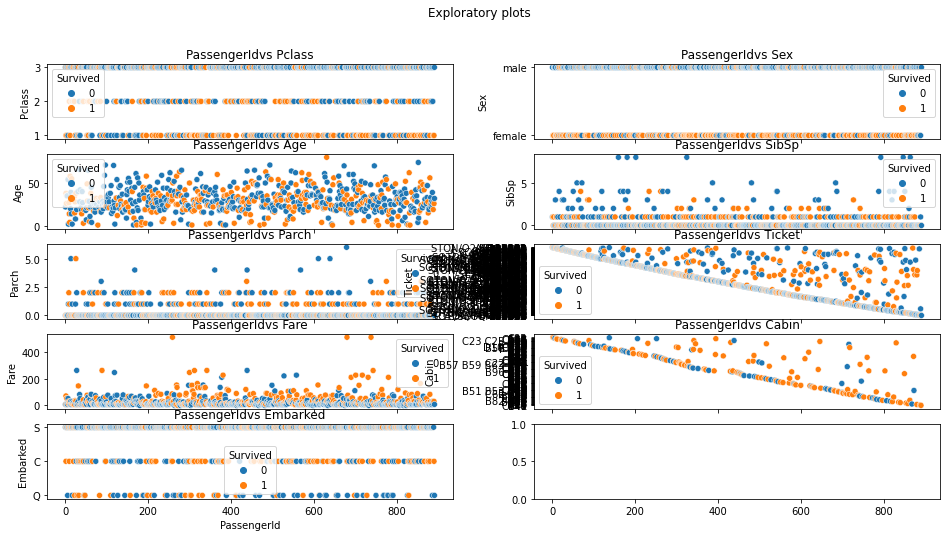

In [21]:
def exploratory_plots(df,keys_to_plot, id_key,y_key):
    fig, axes = plt.subplots(pairs_to_display,2 , sharex=True, figsize=(16,8))
    fig.suptitle('Exploratory plots')

    counter_even=-1
    counter_odd=-1
    for plot_no in range(len(keys_to_plot)):
        kn=keys_to_plot[plot_no]
        if (plot_no % 2) == 0:
            counter_even+=1
            pos1=0
            pos2=counter_even
        else:
            counter_odd+=1
            pos1=1
            pos2=counter_odd
        print(pos1,pos2)
        sns.scatterplot(ax=axes[pos2,pos1],x=df[df.keys()[id_key]], y=df[df.keys()[kn]], hue=df.keys()[y_key],data=df)
        axes[pos2,pos1].set_title(df.keys()[id_key]+'vs '+df.keys()[kn])
        
exploratory_plots(df,keys_to_plot, id_key,y_key)      

Text(0.5, 1.0, 'Pclass vs Age')

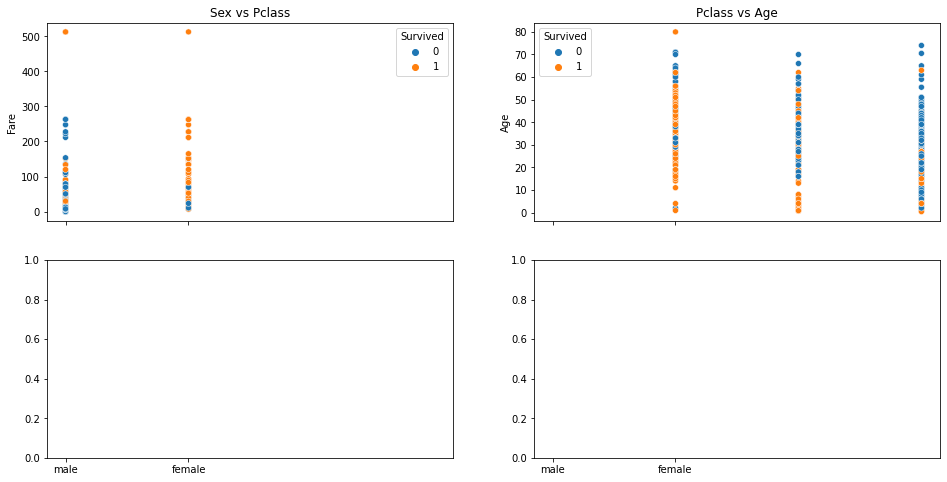

In [22]:
fig, axes = plt.subplots(2,2 , sharex=True, figsize=(16,8))
sns.scatterplot(ax=axes[0,0],x='Sex', y='Fare', hue='Survived',data=train_data)
axes[0,0].set_title('Sex vs Pclass')


sns.scatterplot(ax=axes[0,1],x='Pclass', y='Age', hue='Survived',data=train_data)
axes[0,1].set_title('Pclass vs Age')


In [23]:
def feature_frame_creator_titanic(df):
    Sexy_dict={'male':0,'female':1}
    
    column_names=['Sex','Pclass']
    feature_frame=pd.DataFrame(columns=column_names)
    feature_frame['Sex']= df['Sex'].copy().map(Sexy_dict)
    feature_frame['Pclass']= df['Pclass'].copy()
    
    return feature_frame

In [24]:
#feature frame
FF_creator=feature_frame_creator_titanic
feature_frame_train=FF_creator(df)

#labels
y_labels=df[df.keys()[y_key]].copy()

#train test split
X_train, X_test, y_train, y_test = train_test_split(feature_frame_train,y_labels, random_state=0)
#select model
lr=0.1
num_est=30
clf = GradientBoostingClassifier(n_estimators=num_est,learning_rate=lr).fit(X_train, y_train)

#score
    
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test,  y_test)))

#predict
y_predict=clf.predict( FF_creator(test_data))
print(y_predict)

#output formating


column_names=[df.keys()[id_key],df.keys()[y_key]]
output=pd.DataFrame(columns=column_names)
output[df.keys()[id_key]]= test_data[df.keys()[id_key]]
output[df.keys()[y_key]]= y_predict           

print(output)
output.to_csv(problem_name+'.csv',index=0)


Accuracy of classifier on training set: 0.79
Accuracy of classifier on test set: 0.78
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
     PassengerId  Survived
0            892         0
1          